In [1]:
import xarray as xr

NWP_ZARR_PATH = "/media/jack/wd_18tb/data/ocf/NWP/UK_Met_Office/UKV/zarr/UKV_intermediate_version_3.zarr"

In [10]:
%%time
ds = xr.open_dataset(
    NWP_ZARR_PATH,
    engine="zarr",
    mode="r",
    chunks=None,  # Reading Satellite Zarr benefits from setting chunks='auto'
                  # (see issue #456) but 'auto' massively slows down reading NWPs.
    consolidated=True,
    )

CPU times: user 216 ms, sys: 68.3 ms, total: 285 ms
Wall time: 285 ms


In [11]:
ds

<xarray.Dataset>
Dimensions:    (variable: 17, init_time: 5319, step: 37, y: 704, x: 548)
Coordinates:
  * init_time  (init_time) datetime64[ns] 2020-01-01 ... 2021-11-08T15:00:00
  * step       (step) timedelta64[ns] 00:00:00 01:00:00 ... 1 days 12:00:00
  * variable   (variable) <U6 'cdcb' 'lcc' 'mcc' ... 'wdir10' 'prmsl' 'prate'
  * x          (x) int64 -239000 -237000 -235000 ... 851000 853000 855000
  * y          (y) int64 1223000 1221000 1219000 ... -179000 -181000 -183000
Data variables:
    UKV        (variable, init_time, step, y, x) float32 ...

In [5]:
ds.y[0] < ds.y[1]

<xarray.DataArray 'y' ()>
array(False)

In [6]:
import pandas as pd

In [7]:
time = pd.DatetimeIndex(ds.init_time)

In [8]:
time

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 03:00:00',
               '2020-01-01 06:00:00', '2020-01-01 09:00:00',
               '2020-01-01 12:00:00', '2020-01-01 15:00:00',
               '2020-01-01 18:00:00', '2020-01-01 21:00:00',
               '2020-01-02 00:00:00', '2020-01-02 03:00:00',
               ...
               '2021-11-07 12:00:00', '2021-11-07 15:00:00',
               '2021-11-07 18:00:00', '2021-11-07 21:00:00',
               '2021-11-08 00:00:00', '2021-11-08 03:00:00',
               '2021-11-08 06:00:00', '2021-11-08 09:00:00',
               '2021-11-08 12:00:00', '2021-11-08 15:00:00'],
              dtype='datetime64[ns]', length=5319, freq=None)

In [9]:
time.duplicated().any()

False

In [12]:
assert time.is_unique

In [13]:
assert time.is_monotonic_increasing

In [15]:
ukv = ds["UKV"]

In [16]:
ukv

<xarray.DataArray 'UKV' (variable: 17, init_time: 5319, step: 37, y: 704, x: 548)>
[1290725390592 values with dtype=float32]
Coordinates:
  * init_time  (init_time) datetime64[ns] 2020-01-01 ... 2021-11-08T15:00:00
  * step       (step) timedelta64[ns] 00:00:00 01:00:00 ... 1 days 12:00:00
  * variable   (variable) <U6 'cdcb' 'lcc' 'mcc' ... 'wdir10' 'prmsl' 'prate'
  * x          (x) int64 -239000 -237000 -235000 ... 851000 853000 855000
  * y          (y) int64 1223000 1221000 1219000 ... -179000 -181000 -183000
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             egrr
    GRIB_centreDescription:  U.K. Met Office - Exeter
    GRIB_edition:            2
    GRIB_subCentre:          0
    institution:             U.K. Met Office - Exeter

In [21]:
ukv.sel(init_time="2020-01-01T00:00", method="pad")

<xarray.DataArray 'UKV' (variable: 17, step: 37, y: 704, x: 548)>
[242663168 values with dtype=float32]
Coordinates:
    init_time  datetime64[ns] 2020-01-01
  * step       (step) timedelta64[ns] 00:00:00 01:00:00 ... 1 days 12:00:00
  * variable   (variable) <U6 'cdcb' 'lcc' 'mcc' ... 'wdir10' 'prmsl' 'prate'
  * x          (x) int64 -239000 -237000 -235000 ... 851000 853000 855000
  * y          (y) int64 1223000 1221000 1219000 ... -179000 -181000 -183000
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             egrr
    GRIB_centreDescription:  U.K. Met Office - Exeter
    GRIB_edition:            2
    GRIB_subCentre:          0
    institution:             U.K. Met Office - Exeter

In [30]:
ukv.sel(init_time="2020-01-01T01:00", method="pad").init_time.values

numpy.datetime64('2020-01-01T00:00:00.000000000')

In [32]:
_time_dim_name = "init_time"
ukv.sel({_time_dim_name: "2020-01-01T01:00"}, method="pad")

<xarray.DataArray 'UKV' (variable: 17, step: 37, y: 704, x: 548)>
[242663168 values with dtype=float32]
Coordinates:
    init_time  datetime64[ns] 2020-01-01
  * step       (step) timedelta64[ns] 00:00:00 01:00:00 ... 1 days 12:00:00
  * variable   (variable) <U6 'cdcb' 'lcc' 'mcc' ... 'wdir10' 'prmsl' 'prate'
  * x          (x) int64 -239000 -237000 -235000 ... 851000 853000 855000
  * y          (y) int64 1223000 1221000 1219000 ... -179000 -181000 -183000
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             egrr
    GRIB_centreDescription:  U.K. Met Office - Exeter
    GRIB_edition:            2
    GRIB_subCentre:          0
    institution:             U.K. Met Office - Exeter

In [33]:
NWP_STD = {
    "t": 5.017000766747606,
    "dswrf": 233.1834250473355,
    "prate": 0.00021690701537950742,
    "r": 15.705370079694358,
    "sde": 0.07560040052148084,
    "si10": 2.664583614352396,
    "vis": 12963.802514945439,
    "lcc": 40.06675870700349,
    "mcc": 41.927221148316384,
    "hcc": 39.05157559763763,
}

In [38]:
NWP_CHANNEL_NAMES = list(NWP_STD.keys())
xr.DataArray(
    [NWP_STD[key] for key in NWP_CHANNEL_NAMES],
    coords={"channel": NWP_CHANNEL_NAMES}
    )

<xarray.DataArray (channel: 10)>
array([5.01700077e+00, 2.33183425e+02, 2.16907015e-04, 1.57053701e+01,
       7.56004005e-02, 2.66458361e+00, 1.29638025e+04, 4.00667587e+01,
       4.19272211e+01, 3.90515756e+01])
Coordinates:
  * channel  (channel) <U5 't' 'dswrf' 'prate' 'r' ... 'vis' 'lcc' 'mcc' 'hcc'

In [1]:
from power_perceiver.load_raw.data_sources.raw_nwp_data_source import RawNWPDataSource
from power_perceiver.consts import Location
import pandas as pd
NWP_ZARR_PATH = "/media/jack/wd_18tb/data/ocf/NWP/UK_Met_Office/UKV/zarr/UKV_intermediate_version_3.zarr"


In [2]:
raw_nwp = RawNWPDataSource(
    zarr_path=NWP_ZARR_PATH,
    roi_height_pixels=4,
    roi_width_pixels=4,
    history_duration=pd.Timedelta(hours=1),
    forecast_duration=pd.Timedelta(hours=2),
    start_date="2020-01-01",
    end_date="2020-12-31",
    y_coarsen=16,
    x_coarsen=16,
    channels=["dswrf", "t", "si10", "prate"]
    
)

In [3]:
raw_nwp.per_worker_init(worker_id=0)

In [4]:
raw_nwp.datetime_index

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-12-31 15:00:00', '2020-12-31 16:00:00',
               '2020-12-31 17:00:00', '2020-12-31 18:00:00',
               '2020-12-31 19:00:00', '2020-12-31 20:00:00',
               '2020-12-31 21:00:00', '2020-12-31 22:00:00',
               '2020-12-31 23:00:00', '2021-01-01 00:00:00'],
              dtype='datetime64[ns]', length=8523, freq=None)

In [5]:
t0_periods = raw_nwp.get_contiguous_t0_time_periods()

In [6]:
t0_periods

,start_dt,end_dt
0,2020-01-01 01:00:00,2020-01-28 10:00:00
1,2020-01-28 16:00:00,2020-02-21 04:00:00
2,2020-02-21 13:00:00,2020-03-13 01:00:00
3,2020-03-22 13:00:00,2020-07-29 01:00:00
4,2020-07-30 10:00:00,2020-12-13 07:00:00
5,2020-12-13 13:00:00,2020-12-31 22:00:00


In [5]:
raw_nwp.data_on_disk.step

<xarray.DataArray 'step' (step: 37)>
array([              0,   3600000000000,   7200000000000,  10800000000000,
        14400000000000,  18000000000000,  21600000000000,  25200000000000,
        28800000000000,  32400000000000,  36000000000000,  39600000000000,
        43200000000000,  46800000000000,  50400000000000,  54000000000000,
        57600000000000,  61200000000000,  64800000000000,  68400000000000,
        72000000000000,  75600000000000,  79200000000000,  82800000000000,
        86400000000000,  90000000000000,  93600000000000,  97200000000000,
       100800000000000, 104400000000000, 108000000000000, 111600000000000,
       115200000000000, 118800000000000, 122400000000000, 126000000000000,
       129600000000000], dtype='timedelta64[ns]')
Coordinates:
  * step     (step) timedelta64[ns] 00:00:00 01:00:00 ... 1 days 12:00:00
Attributes:
    long_name:      time since forecast_reference_time
    standard_name:  forecast_period

In [6]:
xr_example = raw_nwp._get_time_slice(
    xr_data=raw_nwp.data_on_disk, 
    t0_datetime_utc=pd.Timestamp("2020-12-13T11:00:00"))
xr_example

<xarray.DataArray 'UKV' (target_time_utc: 4, channel: 4, y_osgb: 44, x_osgb: 34)>
dask.array<getitem, shape=(4, 4, 44, 34), dtype=float32, chunksize=(2, 4, 44, 34), chunktype=numpy.ndarray>
Coordinates:
    init_time_utc    datetime64[ns] 2020-12-13T06:00:00
    step             (target_time_utc) timedelta64[ns] 04:00:00 ... 07:00:00
  * channel          (channel) <U6 'dswrf' 't' 'si10' 'prate'
  * x_osgb           (x_osgb) float32 -2.24e+05 -1.92e+05 ... 8e+05 8.32e+05
  * y_osgb           (y_osgb) float32 1.208e+06 1.176e+06 ... -1.68e+05
  * target_time_utc  (target_time_utc) datetime64[ns] 2020-12-13T10:00:00 ......
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             egrr
    GRIB_centreDescription:  U.K. Met Office - Exeter
    GRIB_edition:            2
    GRIB_subCentre:          0
    institution:             U.K. Met Office - Exeter

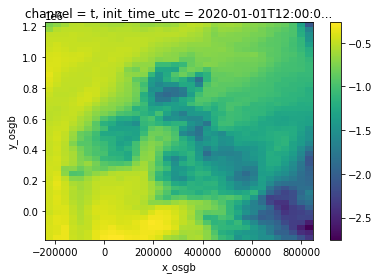

In [14]:
raw_nwp._post_process(xr_example).sel(channel="t").isel(target_time_utc=0).plot()

In [15]:
raw_nwp.load_subset_into_ram(
    pd.DataFrame(
        [
            dict(
                start_dt=pd.Timestamp("2020-01-01"),
                end_dt=pd.Timestamp("2020-01-02"),
            )
        ]
    )
)

In [17]:
raw_nwp.to_numpy(raw_nwp.get_example(
    t0_datetime_utc="2020-01-01T07:00",
    center_osgb=Location(x=96000, y=888000),
))

{<BatchKey.nwp: 11>: array([[[[-1.26368198, -1.26368198, -1.26368198, -1.26368198],
          [-1.26368198, -1.26368198, -1.26368198, -1.26368198],
          [-1.26368198, -1.26368198, -1.26368198, -1.26368198],
          [-1.26368198, -1.26368198, -1.26368198, -1.26368198]],
 
         [[-0.50938575, -0.56388185, -0.67475973, -0.83648401],
          [-0.53897265, -0.61060409, -0.81670264, -0.97763615],
          [-0.56615075, -0.6500026 , -0.81086312, -0.76126978],
          [-0.58070088, -0.67749092, -0.76337444, -0.94875486]],
 
         [[ 3.14318634,  3.31558642,  3.50836468,  2.54755605],
          [ 2.87007289,  3.04144721,  2.91639793,  1.91102267],
          [ 2.80468965,  2.7658413 ,  2.36254797,  3.22982714],
          [ 2.63302256,  2.49492648,  2.38790929,  2.27107005]],
 
         [[-0.1663299 , -0.1655195 , -0.1663299 , -0.1663299 ],
          [-0.1663299 , -0.1663299 , -0.1663299 , -0.1663299 ],
          [-0.1663299 , -0.1663299 , -0.15836998, -0.1663299 ],
          [